In [1]:
import cptac

# Load BRCA
data = cptac.Brca()

# Force download proteomics from 'bcm'
proteomics_df = data.get_proteomics(source="bcm")  # download=True ensures the data is retrieved
print(proteomics_df.head())

Name                      A1BG                A2M              A2ML1  \
Database_ID ENSG00000121410.12 ENSG00000175899.15 ENSG00000166535.20   
Patient_ID                                                             
01BR001              28.962261          29.779428          21.351352   
01BR008              27.839429          29.287993          23.739284   
01BR009              28.443568          30.365854          24.239299   
01BR010              27.795584          28.595986          21.038688   
01BR015              28.515077          28.963103          21.168247   

Name                    A4GALT               AAAS               AACS  \
Database_ID ENSG00000128274.17 ENSG00000094914.14 ENSG00000081760.17   
Patient_ID                                                             
01BR001                    NaN          24.221998          25.562177   
01BR008                    NaN          24.249476          24.889247   
01BR009                    NaN          23.983666          25.3

In [2]:
import cptac
import pandas as pd

# ----------------------------
# Step 1: Load dataset
# ----------------------------
data = cptac.Brca()

# ----------------------------
# Step 2: Get proteomics from BCM source
# ----------------------------
proteomics_df = data.get_proteomics(source="bcm")
print("Proteomics shape:", proteomics_df.shape)
print("Proteomics index:", proteomics_df.index)
print("Proteomics columns:", proteomics_df.columns)

# ----------------------------
# Step 3: Get clinical from MSSM source
# ----------------------------
clinical_df = data.get_clinical(source="mssm")
print("Clinical columns:", clinical_df.columns.tolist())

# ----------------------------
# Step 4: Flatten MultiIndex (both index and columns)
# ----------------------------
if isinstance(proteomics_df.index, pd.MultiIndex):
    proteomics_df = proteomics_df.copy()
    # Use only the first level of the index (usually Patient_ID or Aliquot_ID)
    proteomics_df.index = proteomics_df.index.get_level_values(0)

if isinstance(proteomics_df.columns, pd.MultiIndex):
    # Flatten column MultiIndex
    proteomics_df.columns = ['_'.join(map(str, col)).strip() for col in proteomics_df.columns.values]

# ----------------------------
# Step 5: Reset index and rename
# ----------------------------
proteomics_df = proteomics_df.reset_index()
proteomics_df = proteomics_df.rename(columns={proteomics_df.columns[0]: "Proteomics_ID"})
print("Flattened proteomics columns:", proteomics_df.columns.tolist())

# ----------------------------
# Step 6: Determine merge column in clinical
# ----------------------------
merge_column = None
for col in ['Patient_ID', 'Aliquot_ID', 'Sample_ID', 'tumor_code']:
    if col in clinical_df.columns:
        merge_column = col
        break
if merge_column is None:
    raise ValueError("No valid merge column found in clinical data")
print(f"Merging on clinical column: {merge_column}")

# ----------------------------
# Step 7: Merge proteomics with clinical
# ----------------------------
expr_with_meta = proteomics_df.merge(
    clinical_df,
    left_on="Proteomics_ID",
    right_on=merge_column,
    how="left"
)

# ----------------------------
# Step 8: Save
# ----------------------------
expr_with_meta.to_csv("cptac_brca_proteomics_with_clinical.csv", index=False)
print("Merged shape:", expr_with_meta.shape)
print(expr_with_meta.head())


Proteomics shape: (122, 12021)
Proteomics index: Index(['01BR001', '01BR008', '01BR009', '01BR010', '01BR015', '01BR017',
       '01BR018', '01BR020', '01BR023', '01BR025',
       ...
       '20BR005', '20BR006', '20BR007', '20BR008', '21BR001', '21BR002',
       '21BR010', '22BR005', '22BR006', '604'],
      dtype='object', name='Patient_ID', length=122)
Proteomics columns: MultiIndex([(  'A1BG', 'ENSG00000121410.12'),
            (   'A2M', 'ENSG00000175899.15'),
            ( 'A2ML1', 'ENSG00000166535.20'),
            ('A4GALT', 'ENSG00000128274.17'),
            (  'AAAS', 'ENSG00000094914.14'),
            (  'AACS', 'ENSG00000081760.17'),
            ( 'AADAT', 'ENSG00000109576.14'),
            ( 'AAGAB', 'ENSG00000103591.13'),
            (  'AAK1', 'ENSG00000115977.19'),
            ( 'AAMDC', 'ENSG00000087884.14'),
            ...
            ('ZSWIM8', 'ENSG00000214655.10'),
            ('ZSWIM9', 'ENSG00000185453.13'),
            (  'ZUP1', 'ENSG00000153975.10'),
        

In [3]:
import matplotlib.pyplot as plt

gene = "Tcea1"  # Replace with a gene/protein in your dataset

# Use your proteomics DataFrame
df = proteomics_df.copy()  # ensure we don't modify original

# If columns are MultiIndex, flatten them
if isinstance(df.columns, pd.MultiIndex):
    df.columns = ['_'.join(map(str, col)) for col in df.columns.values]

# Check if gene exists
if gene in df.columns:
    plt.hist(df[gene].astype(float), bins=50)
    plt.title(f"Expression of {gene}")
    plt.xlabel("Expression level")
    plt.ylabel("Number of samples")
    plt.show()
else:
    print(f"Gene {gene} not found. Available columns (first 10): {list(df.columns[:10])}")


Gene Tcea1 not found. Available columns (first 10): ['Proteomics_ID', 'A1BG_ENSG00000121410.12', 'A2M_ENSG00000175899.15', 'A2ML1_ENSG00000166535.20', 'A4GALT_ENSG00000128274.17', 'AAAS_ENSG00000094914.14', 'AACS_ENSG00000081760.17', 'AADAT_ENSG00000109576.14', 'AAGAB_ENSG00000103591.13', 'AAK1_ENSG00000115977.19']


Proteomics shape: (122, 12021)
✅ Preprocessing complete (log-transform, impute, scale)


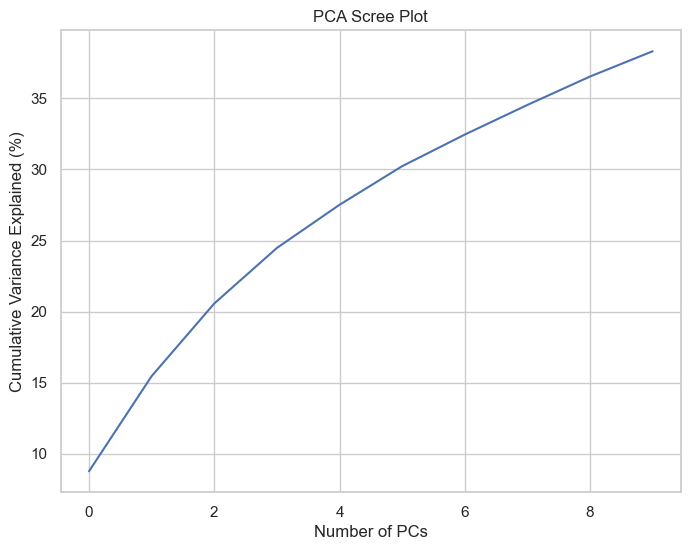

/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


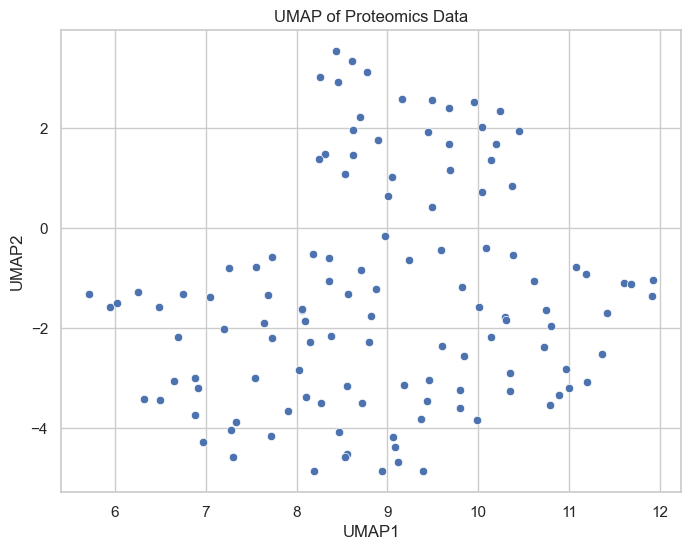

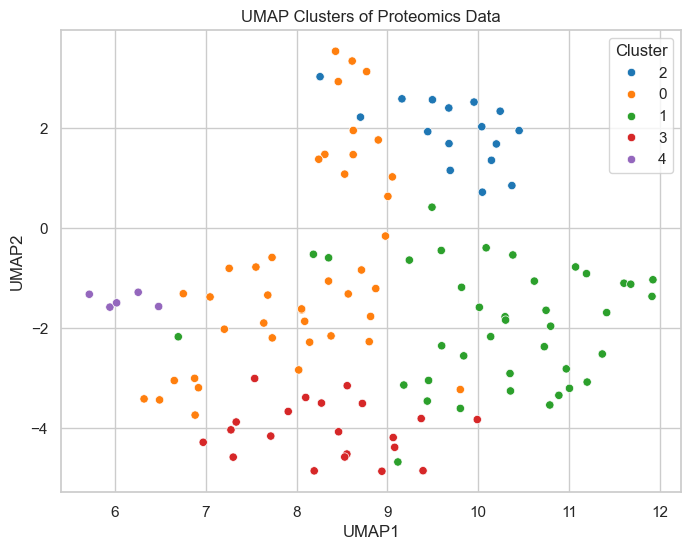

✅ Workflow complete!
 - proteomics_scaled.csv
 - proteomics_pca.csv
 - proteomics_umap.csv


In [4]:
# 📦 Imports
import cptac
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap
import seaborn as sns

# ──────────────────────────────────────────────
# 🔧 Settings
# ──────────────────────────────────────────────
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)

# ──────────────────────────────────────────────
# 📁 Step 1: Load CPTAC BRCA dataset
# ──────────────────────────────────────────────
data = cptac.Brca()

# Get proteomics (BCM source)
proteomics_df = data.get_proteomics(source="bcm")
print("Proteomics shape:", proteomics_df.shape)

# Flatten MultiIndex if exists (use first level: Patient_ID)
if isinstance(proteomics_df.index, pd.MultiIndex):
    proteomics_df = proteomics_df.copy()
    proteomics_df.index = proteomics_df.index.get_level_values(0)

# ----------------------------
# Optional: Save raw proteomics
# ----------------------------
proteomics_df.to_csv("cptac_brca_proteomics.csv")

# ──────────────────────────────────────────────
# 🧪 Step 2: Preprocessing
# ──────────────────────────────────────────────
# Log-transform (common in proteomics)
proteomics_log = np.log1p(proteomics_df)

# Impute missing values (median per protein)
imputer = SimpleImputer(strategy="median")
proteomics_imputed = pd.DataFrame(
    imputer.fit_transform(proteomics_log),
    index=proteomics_log.index,
    columns=proteomics_log.columns
)

# Scale per sample
scaler = StandardScaler()
proteomics_scaled = pd.DataFrame(
    scaler.fit_transform(proteomics_imputed),
    index=proteomics_imputed.index,
    columns=proteomics_imputed.columns
)

print("✅ Preprocessing complete (log-transform, impute, scale)")

# ──────────────────────────────────────────────
# 🔬 Step 3: PCA
# ──────────────────────────────────────────────
pca = PCA(n_components=10)
pca_result = pca.fit_transform(proteomics_scaled)
pca_df = pd.DataFrame(
    pca_result,
    index=proteomics_scaled.index,
    columns=[f"PC{i+1}" for i in range(pca_result.shape[1])]
)

# Scree plot
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("Number of PCs")
plt.ylabel("Cumulative Variance Explained (%)")
plt.title("PCA Scree Plot")
plt.show()

# ──────────────────────────────────────────────
# 🔍 Step 4: UMAP
# ──────────────────────────────────────────────
reducer = umap.UMAP(n_neighbors=10, min_dist=0.3, random_state=42)
umap_result = reducer.fit_transform(pca_df)
umap_df = pd.DataFrame(
    umap_result,
    index=pca_df.index,
    columns=["UMAP1", "UMAP2"]
)

plt.figure()
sns.scatterplot(x="UMAP1", y="UMAP2", data=umap_df)
plt.title("UMAP of Proteomics Data")
plt.show()

# ──────────────────────────────────────────────
# 🔖 Step 5: Clustering (KMeans example)
# ──────────────────────────────────────────────
from sklearn.cluster import KMeans

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(pca_df)
umap_df["Cluster"] = clusters.astype(str)

plt.figure()
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Cluster", data=umap_df, palette="tab10")
plt.title("UMAP Clusters of Proteomics Data")
plt.show()

# ──────────────────────────────────────────────
# 🧬 Step 6: Save processed data
# ──────────────────────────────────────────────
proteomics_scaled.to_csv("proteomics_scaled.csv")
pca_df.to_csv("proteomics_pca.csv")
umap_df.to_csv("proteomics_umap.csv")

print("✅ Workflow complete!")
print(" - proteomics_scaled.csv")
print(" - proteomics_pca.csv")
print(" - proteomics_umap.csv")


In [8]:
# -----------------------------
# Imports
# -----------------------------
import cptac
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.utils import dense_to_sparse
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
import gym
from gym import spaces
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

# -----------------------------
# Reproducibility & device
# -----------------------------
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)
DEVICE = torch.device("cpu")

# -----------------------------
# Step 1: Load CPTAC Proteomics
# -----------------------------
data = cptac.Brca()
proteomics_df = data.get_proteomics(source="bcm")

# Flatten MultiIndex if exists
if isinstance(proteomics_df.index, pd.MultiIndex):
    proteomics_df.index = proteomics_df.index.get_level_values(0)

# Log-transform and impute missing values
proteomics_log = np.log1p(proteomics_df)
imputer = SimpleImputer(strategy="median")
proteomics_imputed = pd.DataFrame(
    imputer.fit_transform(proteomics_log),
    index=proteomics_log.index,
    columns=proteomics_log.columns
)

# Select top N genes by variance
N_GENES_SELECT = 20
top_genes = proteomics_imputed.var(axis=0).sort_values(ascending=False).index[:N_GENES_SELECT]
X_full = proteomics_imputed[top_genes].values.astype(np.float32)
selected_gene_names = list(top_genes)

# Use sample indices as pseudotime
pseudotime = np.arange(X_full.shape[0], dtype=np.float32)

# -----------------------------
# Step 2: Train/test split & normalization
# -----------------------------
train_idx, test_idx = train_test_split(np.arange(X_full.shape[0]), test_size=0.2, random_state=SEED)
expression_train = X_full[train_idx]
expression_test = X_full[test_idx]
pseudotime_train = pseudotime[train_idx]
pseudotime_test = pseudotime[test_idx]

scaler = StandardScaler()
expression_train = scaler.fit_transform(expression_train)
expression_test = scaler.transform(expression_test)

# -----------------------------
# Step 3: Adjacency matrix for GCN
# -----------------------------
n_genes = expression_train.shape[1]
corr_matrix = np.corrcoef(np.vstack([expression_train, expression_test]).T)
adj_matrix = np.zeros_like(corr_matrix)
corr_threshold = 0.1
for i in range(n_genes):
    for j in range(n_genes):
        if i != j and abs(corr_matrix[i, j]) >= corr_threshold:
            adj_matrix[i, j] = float(corr_matrix[i, j])

adj_tensor = torch.tensor(adj_matrix, dtype=torch.float32)
edge_index, edge_weight = dense_to_sparse(adj_tensor)

# -----------------------------
# Step 4: GCN Autoencoder
# -----------------------------
GCN_HIDDEN = 64
GCN_EMB = 32
AE_TRAIN_EPOCHS = 200

class GCN_AE(nn.Module):
    def __init__(self, in_dim=1, hidden_dim=GCN_HIDDEN, emb_dim=GCN_EMB):
        super().__init__()
        self.enc1 = GCNConv(in_dim, hidden_dim)
        self.enc2 = GCNConv(hidden_dim, emb_dim)
        self.dec = nn.Sequential(
            nn.Linear(emb_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, in_dim)
        )
    def forward(self, x, edge_index):
        x = self.enc1(x, edge_index)
        x = F.relu(x)
        emb = self.enc2(x, edge_index)
        recon = self.dec(emb)
        return recon, emb

# Prepare input (mean per gene)
mean_expr = np.mean(expression_train, axis=0).reshape(-1,1).astype(np.float32)
x_input = torch.tensor(mean_expr)

gcn_ae = GCN_AE(in_dim=1).to(DEVICE)
opt = torch.optim.Adam(gcn_ae.parameters(), lr=1e-3, weight_decay=1e-5)
loss_fn = nn.MSELoss()

# Train
gcn_ae.train()
for epoch in range(AE_TRAIN_EPOCHS):
    opt.zero_grad()
    recon, emb = gcn_ae(x_input.to(DEVICE), edge_index.to(DEVICE))
    loss = loss_fn(recon.squeeze(), x_input.squeeze())
    loss.backward()
    opt.step()
    if (epoch + 1) % 50 == 0:
        print(f"AE epoch {epoch+1}/{AE_TRAIN_EPOCHS} loss {loss.item():.6f}")

torch.save(gcn_ae.state_dict(), "gcn_ae.pth")
gcn_ae.eval()

# -----------------------------
# Step 5: GCN Encoder
# -----------------------------
class GeneGCN_Encoder(nn.Module):
    def __init__(self, gcn_ae):
        super().__init__()
        self.enc1 = gcn_ae.enc1
        self.enc2 = gcn_ae.enc2
    def forward(self, x, edge_index):
        x = self.enc1(x, edge_index)
        x = F.relu(x)
        emb = self.enc2(x, edge_index)
        return emb

encoder = GeneGCN_Encoder(gcn_ae).to(DEVICE)
encoder.eval()
torch.save(encoder.state_dict(), "gcn_encoder.pth")

# -----------------------------
# Step 6: Adaptive Threshold class
# -----------------------------
class PerGeneAdaptiveThreshold:
    def __init__(self, gene_list, alpha=0.1):
        self.thresholds = {int(g): 0.0 for g in gene_list}
        self.alpha = alpha
    def update(self, gene_rewards):
        for gene_id, reward in gene_rewards.items():
            if reward is None or np.isnan(reward):
                continue
            self.thresholds[int(gene_id)] = self.alpha * float(reward) + (1-self.alpha) * self.thresholds.get(int(gene_id),0.0)
    def get(self, gene_id):
        return float(self.thresholds.get(int(gene_id), 0.0))

# -----------------------------
# Step 7: Discrete CRISPR Environment
# -----------------------------
class CPTAC_CRISPER_Env(gym.Env):
    """Discrete gene environment with CRISPR perturbations."""
    metadata = {"render_modes": ["human"]}
    def __init__(self, expression, pseudotime, max_steps=40, adaptive_thresholds=None,
                 device='cpu', action_magnitude=0.25, perturb_prob=0.1, max_perturb=3):
        super().__init__()
        self.expression = np.asarray(expression, dtype=np.float32)
        self.pseudotime = np.asarray(pseudotime, dtype=np.float32)
        self.n_cells, self.n_genes = self.expression.shape
        self.max_steps = max_steps
        self.adaptive_thresholds = adaptive_thresholds
        self.device = device
        self.action_magnitude = action_magnitude
        self.perturb_prob = perturb_prob
        self.max_perturb = max_perturb
        self.action_space = spaces.Discrete(self.n_genes * 3)
        self.observation_space = spaces.Box(low=-5.0, high=5.0, shape=(self.n_genes,), dtype=np.float32)
    def reset(self, seed=None, options=None):
        self.idx = np.random.randint(self.n_cells)
        self.state = self.expression[self.idx].copy()
        self.original_state = self.state.copy()
        eligible_idxs = np.where(self.pseudotime > self.pseudotime[self.idx])[0]
        if len(eligible_idxs) == 0:
            eligible_idxs = np.array([self.idx])
        target_idx = np.random.choice(eligible_idxs)
        self.target = self.expression[target_idx].copy()
        self.reward_gene = int(np.random.randint(self.n_genes))
        self.target_value = float(self.target[self.reward_gene])
        self.steps = 0
        self.history = [self.state.copy()]
        self.knockout_genes = set()
        self.overexpressed_genes = set()
        self._apply_crispr_perturbation()
        return self.state.copy(), {}
    def _apply_crispr_perturbation(self):
        n_perturb = np.random.randint(1, self.max_perturb+1)
        for _ in range(n_perturb):
            gene = np.random.randint(0, self.n_genes)
            if np.random.rand() < 0.5:
                self.state[gene] = 0.0
                self.knockout_genes.add(gene)
            else:
                self.state[gene] *= 2.0
                self.overexpressed_genes.add(gene)
    def step(self, action):
        gene_id = action // 3
        direction = (action % 3) - 1
        self.state[gene_id] = np.clip(self.state[gene_id]+direction*self.action_magnitude, -5.0, 5.0)
        if np.random.rand() < self.perturb_prob:
            self._apply_crispr_perturbation()
        old_mse = float(np.mean((self.history[-1]-self.target)**2))
        new_mse = float(np.mean((self.state-self.target)**2))
        reward = old_mse-new_mse
        gene_improvement = abs(self.original_state[self.reward_gene]-self.target[self.reward_gene]) \
                           - abs(self.state[self.reward_gene]-self.target[self.reward_gene])
        reward += 0.2*float(gene_improvement)
        if self.adaptive_thresholds:
            reward -= self.adaptive_thresholds.get(self.reward_gene)
        self.steps += 1
        self.history.append(self.state.copy())
        terminated = self.steps >= self.max_steps
        return self.state.copy(), float(reward), terminated, False, {"reward_gene": int(self.reward_gene)}
    def render(self, mode='human'):
        print(f"Step {self.steps} - gene {self.reward_gene} value {self.state[self.reward_gene]:.4f}")
        print(f"Knockouts: {sorted(list(self.knockout_genes))}, Overexpressed: {sorted(list(self.overexpressed_genes))}")

# -----------------------------
# Step 8: Initialize environment
# -----------------------------
gene_list = list(range(expression_train.shape[1]))
adaptive_thresholds = PerGeneAdaptiveThreshold(gene_list)
#env = CPTAC_CRISPER_Env(expression_train, pseudotime_train, adaptive_thresholds)
#state, _ = env.reset()
#print("Initial state:", state)
#def make_env_factory(expression, perturb_prob=PERTURB_PROB, max_perturb=MAX_PERTURB):
 #   def _init():
 #       base_env = CPTAC_CRISPR_Env(expression, perturb_prob=perturb_prob, max_perturb=max_perturb)
 #       return GRNEnvWrapper(base_env)
 #   return _init

AE epoch 50/200 loss 0.000001
AE epoch 100/200 loss 0.000000
AE epoch 150/200 loss 0.000000
AE epoch 200/200 loss 0.000000


In [9]:
# --------------------------
# Full PPO Script with CPTAC Proteomics CRISPR Simulation
# --------------------------
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_squared_error, mean_absolute_error, r2_score,
    average_precision_score
)
from scipy.interpolate import interp1d

import gym
from gym import spaces
import torch
import torch.nn.functional as F
from torch import optim
from torch.optim import Optimizer
import math

from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize

# --------------------------
# CONFIGURATION
# --------------------------
SEED = 42
DEVICE = "cuda"  # "cpu" or "cuda"
MAX_STEPS = 100
PERTURB_PROB = 0.5
MAX_PERTURB = 20
n_eval_episodes = 30

np.random.seed(SEED)
torch.manual_seed(SEED)

# --------------------------
# CPTAC Proteomics CRISPR Environment
# --------------------------
#CPTAC_CRISPER_Env

class GRNEnvWrapper(gym.Env):
    def __init__(self, base_env):
        super().__init__()
        self.env = base_env
        self.observation_space = spaces.Box(
            low=-np.inf,
            high=np.inf,
            shape=(self.env.expression.shape[1],),
            dtype=np.float32
        )
        self.action_space = self.env.action_space

    def reset(self, **kwargs):
        state = self.env.reset(**kwargs)
        if isinstance(state, tuple):
            state = state[0]
        if not hasattr(self.env, 'current_cell'):
            self.env.current_cell = 0
        return np.array(state, dtype=np.float32)

    def step(self, action):
        result = self.env.step(action)
        if len(result) == 5:
            obs, reward, terminated, truncated, info = result
            done = terminated or truncated
        else:
            obs, reward, done, info = result
        obs = np.array(obs, dtype=np.float32)
        if hasattr(self.env, 'current_cell'):
            self.env.current_cell += 1
        return obs, reward, done, info

    def seed(self, seed=None):
        if hasattr(self.env, 'seed'):
            self.env.seed(seed)
        np.random.seed(seed)

# --------------------------
# UTILITY FUNCTIONS
# --------------------------
def resample_sequence(seq, target_len):
    seq = np.asarray(seq)
    orig_len = len(seq)
    if orig_len == target_len:
        return seq
    x_old = np.linspace(0, 1, orig_len)
    x_new = np.linspace(0, 1, target_len)
    f = interp1d(x_old, seq, kind='linear')
    return f(x_new)

def make_env_factory(expression, pseudotime, adaptive_thresholds,
                     perturb_prob=PERTURB_PROB, max_perturb=MAX_PERTURB):
    def _init():
        base_env = CPTAC_CRISPER_Env(
            expression=expression,
            pseudotime=pseudotime,
            max_steps=MAX_STEPS,
            adaptive_thresholds=adaptive_thresholds,
            device=DEVICE,
            perturb_prob=perturb_prob,
            max_perturb=max_perturb
        )
        return GRNEnvWrapper(base_env)
    return _init

# --------------------------
# MODEL EVALUATION
# --------------------------
def evaluate_model(model, env, n_eval_episodes=30):
    rewards = []
    for _ in range(n_eval_episodes):
        obs = env.reset()
        done = False
        total_reward = 0
        while not done:
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, done, _ = env.step(action)
            total_reward += reward
        rewards.append(total_reward)
    return np.mean(rewards), np.std(rewards)

def train_with_retry(model, total_timesteps, retries=3):
    for attempt in range(1, retries + 1):
        try:
            model.learn(total_timesteps=total_timesteps)
            break
        except IndexError as e:
            print(f"⚠️ IndexError during training attempt {attempt}: {e}")
            if attempt == retries:
                raise
            print("Retrying training...")





# --------------------------
def resample_sequence(seq, target_len):
    seq = np.asarray(seq)
    orig_len = len(seq)
    if orig_len == target_len:
        return seq
    x_old = np.linspace(0, 1, orig_len)
    x_new = np.linspace(0, 1, target_len)
    f = interp1d(x_old, seq, kind='linear')
    return f(x_new)


def count_nonzero(tensor):
    return int((tensor != 0).sum().item())

# --------------------------
# Custom Optimizers
# --------------------------
# Padam, ASGDAdam, ASGDAmsgrad definitions remain the same (from your previous script)
# ... (Copy your Padam, ASGDAdam, ASGDAmsgrad classes here) ...
def count_nonzero(tensor):
    return int((tensor != 0).sum().item())

class ASGDAdam(Optimizer):
    """ASGD-style optimizer using separate lr_min/lr_max per step."""
    def __init__(self, params, lr=None, beta1=0.9, beta2=0.999, eps=1e-8,
                 lr_min=1e-4, lr_max=3e-4):
        defaults = dict(beta1=beta1, beta2=beta2, eps=eps, lr_min=lr_min, lr_max=lr_max)
        super().__init__(params, defaults)
        self.last_total_nonzero_fmin = 0
        self.last_total_nonzero_fmax = 0
        self.last_lr = lr_max

    @torch.no_grad()
    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()
        total_nonzero_fmin, total_nonzero_fmax = 0, 0
        for group in self.param_groups:
            beta1, beta2, eps = group['beta1'], group['beta2'], group['eps']
            for p in group['params']:
                if p.grad is None:
                    continue
                g = p.grad
                state = self.state[p]
                if not state:
                    state['t'] = 0
                    state['m'] = torch.zeros_like(p)
                    state['v'] = torch.zeros_like(p)
                    state['v_prev'] = torch.zeros_like(p)
                m, v = state['m'], state['v']
                state['t'] += 1
                t = state['t']
                m.mul_(beta1).add_(g, alpha=1-beta1)
                v.mul_(beta2).addcmul_(g, g, value=1-beta2)
                dv = v - state['v_prev']
                state['v_prev'].copy_(v)
                f_min = (dv > 0).to(dtype=torch.int32)
                f_max = (dv <= 0).to(dtype=torch.int32)
                total_nonzero_fmin += count_nonzero(f_min)
                total_nonzero_fmax += count_nonzero(f_max)
                mhat = m / (1 - beta1 ** t)
                state['step_dir'] = mhat / (v.sqrt().add(eps))
        use_lr_min = (total_nonzero_fmax < total_nonzero_fmin) #
        self.last_total_nonzero_fmin = total_nonzero_fmin
        self.last_total_nonzero_fmax = total_nonzero_fmax
        for group in self.param_groups:
            lr = group['lr_min'] if use_lr_min else group['lr_max']
            self.last_lr = lr
            for p in group['params']:
                if p.grad is not None and 'step_dir' in self.state[p]:
                    p.add_(self.state[p]['step_dir'], alpha=-lr)
        return loss

class ASGDAmsgrad(Optimizer):
    """ASGD-style optimizer mimicking AMSGrad"""
    def __init__(self, params, lr=None, beta1=0.9, beta2=0.999, eps=1e-8,
                 lr_min=1e-5, lr_max=3e-4):
        defaults = dict(beta1=beta1, beta2=beta2, eps=eps, lr_min=lr_min, lr_max=lr_max)
        super().__init__(params, defaults)
        self.last_total_nonzero_fmin = 0
        self.last_total_nonzero_fmax = 0
        self.last_lr = lr_max

    @torch.no_grad()
    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()
        total_nonzero_fmin, total_nonzero_fmax = 0, 0
        for group in self.param_groups:
            beta1, beta2, eps = group['beta1'], group['beta2'], group['eps']
            for p in group['params']:
                if p.grad is None:
                    continue
                g = p.grad
                state = self.state[p]
                if not state:
                    state['t'] = 0
                    state['m'] = torch.zeros_like(p)
                    state['v'] = torch.zeros_like(p)
                    state['v_hat'] = torch.zeros_like(p)
                    state['v_prev'] = torch.zeros_like(p)
                m, v, v_hat = state['m'], state['v'], state['v_hat']
                state['t'] += 1
                t = state['t']
                m.mul_(beta1).add_(g, alpha=1-beta1)
                v.mul_(beta2).addcmul_(g, g, value=1-beta2)
                torch.maximum(v_hat, v, out=v_hat)
                denom = v_hat.sqrt().add(eps)
                dv = v - state['v_prev']
                state['v_prev'].copy_(v)
                f_min = (dv > 0).to(dtype=torch.int32)
                f_max = (dv <= 0).to(dtype=torch.int32)
                total_nonzero_fmin += count_nonzero(f_min)
                total_nonzero_fmax += count_nonzero(f_max)
                mhat = m / (1 - beta1 ** t)
                state['step_dir'] = mhat / denom
        use_lr_min = (total_nonzero_fmax <  total_nonzero_fmin) # 
        self.last_total_nonzero_fmin = total_nonzero_fmin
        self.last_total_nonzero_fmax = total_nonzero_fmax
        for group in self.param_groups:
            lr = group['lr_min'] if use_lr_min else group['lr_max']
            self.last_lr = lr
            for p in group['params']:
                if p.grad is not None and 'step_dir' in self.state[p]:
                    p.add_(self.state[p]['step_dir'], alpha=-lr)
        return loss

class Padam(Optimizer):
    """Padam optimizer"""
    def __init__(self, params, lr=1e-3, betas=(0.9,0.999), eps=1e-8, weight_decay=0, amsgrad=False, p=0.125):
        defaults = dict(lr=lr, betas=betas, eps=eps, weight_decay=weight_decay, amsgrad=amsgrad, p=p)
        super().__init__(params, defaults)
    def step(self, closure=None):
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()
        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None: continue
                grad = p.grad.data
                if grad.is_sparse:
                    raise RuntimeError('Padam does not support sparse gradients')
                state = self.state[p]
                amsgrad = group['amsgrad']
                if len(state) == 0:
                    state['step'] = 0
                    state['exp_avg'] = torch.zeros_like(p.data)
                    state['exp_avg_sq'] = torch.zeros_like(p.data)
                    if amsgrad:
                        state['max_exp_avg_sq'] = torch.zeros_like(p.data)
                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                if amsgrad:
                    max_exp_avg_sq = state['max_exp_avg_sq']
                beta1, beta2 = group['betas']
                state['step'] += 1
                exp_avg.mul_(beta1).add_(grad, alpha=1-beta1)
                exp_avg_sq.mul_(beta2).addcmul_(grad, grad, value=1-beta2)
                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']
                if amsgrad:
                    torch.maximum(max_exp_avg_sq, exp_avg_sq, out=max_exp_avg_sq)
                    denom = (max_exp_avg_sq.sqrt() / math.sqrt(bias_correction2)).add_(group['eps'])
                else:
                    denom = (exp_avg_sq.sqrt() / math.sqrt(bias_correction2)).add_(group['eps'])
                step_size = group['lr'] / bias_correction1
                denom = denom.pow(group['p'])
                if group['weight_decay'] != 0:
                    grad = grad.add(p.data, alpha=group['weight_decay'])
                p.data.addcdiv_(exp_avg, denom, value=-step_size)
        return loss


    
def evaluate_and_plot(model, algo_name, expression_test, adj_matrix, pseudotime_test,
                      gene_names, edge_index, edge_weight, encoder_path,
                      adaptive_thresholds, n_episodes=50):
    results = []
    eval_env_factory = make_env_factory(expression_test, pseudotime_test, adaptive_thresholds)

    for gene_idx, gene_name in enumerate(gene_names):
        y_true, y_pred = [], []
        perturbed_vals, original_vals, pseudotimes = [], [], []

        for ep in range(n_episodes):
            env = eval_env_factory()
            try:
                obs = env.reset()
            except IndexError:
                continue

            original = env.env.original_state.copy()
            target = env.env.target.copy()
            pt_idx = getattr(env.env, "current_cell", 0)
            pt_value = float(env.env.pseudotime[pt_idx])
            done = False
            traj_pred = []

            while not done:
                try:
                    action, _ = model.predict(obs, deterministic=True)
                    obs, reward, done, _ = env.step(action)
                except IndexError:
                    break
                traj_pred.append(env.env.state[gene_idx])

            if not traj_pred:
                continue

            final_state = env.env.history[-1]
            delta = float(final_state[gene_idx] - original[gene_idx])
            label = 1 if target[gene_idx] > original[gene_idx] else 0
            prediction = 1 if delta > 0 else 0

            y_true.append(label)
            y_pred.append(prediction)
            perturbed_vals.append(float(final_state[gene_idx]))
            original_vals.append(float(original[gene_idx]))
            pseudotimes.append(pt_value)

        if not y_true:
            continue

        # Classification metrics
        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, average="weighted", zero_division=0)
        rec = recall_score(y_true, y_pred, average="weighted", zero_division=0)
        f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)
        try:
            auprc = average_precision_score(y_true, y_pred)
        except ValueError:
            auprc = np.nan

        # Regression metrics
        mse = mean_squared_error(original_vals, perturbed_vals)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(original_vals, perturbed_vals)
        r2 = r2_score(original_vals, perturbed_vals)
        pc = np.corrcoef(original_vals, perturbed_vals)[0, 1] if np.std(original_vals) != 0 else 0.0

        results.append({
            "Algorithm": algo_name,
            "Gene": gene_name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1": f1,
            "AUPRC": auprc,
            "Final Expression MSE": mse,
            "Final Expression RMSE": rmse,
            "Final Expression MAE": mae,
            "Final Expression R²": r2,
            "Final Expression PearsonCorr": pc
        })

        # Pseudotime trajectory plots
        df = pd.DataFrame({"pseudotime": pseudotimes,
                           "original_expression": original_vals,
                           "perturbed_expression": perturbed_vals})
        df['delta'] = df['perturbed_expression'] - df['original_expression']
        df['label'] = df['delta'].apply(lambda x: "Up" if x > 0 else "Down")
        plt.figure(figsize=(8, 4))
        sns.scatterplot(data=df, x="pseudotime", y="perturbed_expression", hue="label", style="label")
        sns.lineplot(data=df.sort_values('pseudotime'), x="pseudotime", y="perturbed_expression",
                     lw=1, alpha=0.5)
        plt.title(f"{algo_name} — {gene_name} Perturbation")
        plt.xlabel("Pseudotime")
        plt.ylabel("Expression (z-score)")
        plt.grid(True)
        plt.legend()
        os.makedirs("pseudotime_plots", exist_ok=True)
        plt.savefig(f"pseudotime_plots/{algo_name}_{gene_name}.png", dpi=300)
        plt.close()

    return pd.DataFrame(results)

      

# --------------------------
# PPO Wrappers
# --------------------------
class PPOAdamAMSGrad(PPO):
    def __init__(self, *args, **kwargs):
        if "policy_kwargs" not in kwargs: kwargs["policy_kwargs"] = {}
        kwargs["policy_kwargs"].update({"optimizer_class": optim.Adam, "optimizer_kwargs": {"amsgrad": True}})
        super().__init__(*args, **kwargs)

class PPOAdam(PPO):
    def __init__(self, *args, **kwargs):
        if "policy_kwargs" not in kwargs: kwargs["policy_kwargs"] = {}
        kwargs["policy_kwargs"].update({"optimizer_class": optim.Adam})
        super().__init__(*args, **kwargs)

class PPOSGD(PPO):
    def __init__(self, *args, **kwargs):
        if "policy_kwargs" not in kwargs: kwargs["policy_kwargs"] = {}
        kwargs["policy_kwargs"].update({"optimizer_class": optim.SGD})
        super().__init__(*args, **kwargs)

class PPOPadam(PPO):
    def __init__(self, *args, **kwargs):
        if "policy_kwargs" not in kwargs: kwargs["policy_kwargs"] = {}
        kwargs["policy_kwargs"].update({"optimizer_class": Padam, "optimizer_kwargs": {"amsgrad": True}})
        super().__init__(*args, **kwargs)

class PPOASGDAdam(PPO):
    def __init__(self, *args, **kwargs):
        if "policy_kwargs" not in kwargs: kwargs["policy_kwargs"] = {}
        kwargs["policy_kwargs"].update({"optimizer_class": ASGDAdam, "optimizer_kwargs": {"lr_min":1e-7, "lr_max":1e-3}})
        super().__init__(*args, **kwargs)

class PPOASGDAmsgrad(PPO):
    def __init__(self, *args, **kwargs):
        if "policy_kwargs" not in kwargs: kwargs["policy_kwargs"] = {}
        kwargs["policy_kwargs"].update({"optimizer_class": ASGDAmsgrad, "optimizer_kwargs": {"lr_min":1e-7, "lr_max":1e-3}})
        super().__init__(*args, **kwargs)



# --------------------------
# Training
# --------------------------
optimizer_kwargs = {
    "amsgrad": dict(learning_rate=1e-4, n_steps=2048, batch_size=64, n_epochs=200),
    "adam": dict(learning_rate=1e-4, n_steps=2048, batch_size=64, n_epochs=200),
    "sgd": dict(learning_rate=1e-2, n_steps=2048, batch_size=64, n_epochs=200),
    "padam": dict(learning_rate=1e-2, n_steps=2048, batch_size=64, n_epochs=200),
    "asgdadam": dict(n_steps=2048, batch_size=64, n_epochs=200),
    "asgdaamsgrad": dict(n_steps=2048, batch_size=64, n_epochs=200),
}

algo_map = {
    "sgd": PPOSGD,
    "amsgrad": PPOAdamAMSGrad,
    "adam": PPOAdam,
    "padam": PPOPadam,
    "asgdadam": PPOASGDAdam,
    "asgdaamsgrad": PPOASGDAmsgrad,
}

base_kwargs = {
    "gamma": 0.99,
    "gae_lambda": 0.95,
    "clip_range": 0.2,
    "ent_coef": 0.0,
    "vf_coef": 0.5,
    "max_grad_norm": 0.5,
    "policy_kwargs": dict(net_arch=[dict(pi=[256,256,256,128], vf=[256,256,256,128])],
                          activation_fn=torch.nn.Tanh)
}

train_steps = 10000
trained_models = {}
results_reward = {}
training_metrics = {}
trained_models = {}

# Make evaluation environment
eval_env = DummyVecEnv([make_env_factory(expression_train, pseudotime_train, adaptive_thresholds)])
eval_env = VecNormalize(eval_env, norm_obs=True, norm_reward=False, clip_obs=10.)
train_metrics_df=[]

for opt_name, PPOClass in algo_map.items():
    print(f"\n--- Training {PPOClass.__name__} with {opt_name} ---")
    train_env = DummyVecEnv([make_env_factory(expression_train, pseudotime_train, adaptive_thresholds)])
    kwargs = base_kwargs.copy()
    kwargs.update(optimizer_kwargs[opt_name])
    model = PPOClass("MlpPolicy", train_env, verbose=0, seed=SEED, **kwargs)
    train_with_retry(model, train_steps)
    trained_models[opt_name] = model
    mean_r, std_r = evaluate_model(model, eval_env, n_eval_episodes=n_eval_episodes)
    results_reward[opt_name] = (mean_r, std_r)

    metrics = {
        "timesteps": [],
        "mean_reward_train": [], "mean_reward_test": [],
        "acc_train": [], "acc_test": [],
        "prec_train": [], "prec_test": [],
        "rec_train": [], "rec_test": [],
        "f1_train": [], "f1_test": [],
        "auprc_train": [], "auprc_test": [],
        "mse_train": [], "mse_test": [],
        "corr_train": [], "corr_test": []
    }

    timesteps_per_eval = 1000000
    total_steps_done = 0
    best_score, best_model = -np.inf, None
    encoder_path="gcn_encoder.pth"
   # while total_steps_done < train_steps:
        #steps_to_do = min(timesteps_per_eval,  - total_steps_done)
    train_with_retry(model, train_steps)
        
    #total_steps_done += steps_to_do
    expr_train_sub, expr_val_sub, ps_train_sub, ps_val_sub = train_test_split(
    expression_train,
    pseudotime_train,
    test_size=0.2,     # 20% validation split (adjust as needed)
    random_state=SEED)
        # Evaluate per-gene metrics
    df_train = evaluate_and_plot(model, f"{opt_name}_train", expression_train, adj_matrix, pseudotime_train,
                                     selected_gene_names, edge_index, edge_weight, encoder_path,
                                     adaptive_thresholds, n_episodes=30)
       # df_test = evaluate_and_plot(model, f"{opt_name}_test", expression_test, adj_matrix, pseudotime_test,
                            #        selected_gene_names, edge_index, edge_weight, encoder_path,
                             #       adaptive_thresholds, n_episodes=30)

    train_metrics_df.append(df_train)            

final_df = pd.concat(train_metrics_df, ignore_index=True)
final_df.to_csv("training_per_gene_metrics_optimizers.csv", index=False)
train_summary_df = final_df.groupby("Algorithm").mean(numeric_only=True)
train_summary_df.to_csv("training_overall_metrics_optimizers.csv")



all_metrics_df = []
for algo_name, model in trained_models.items():
    print(f"\n--- Evaluating per-gene metrics for {algo_name} ---")
    metrics_df = evaluate_and_plot(
        model=model,
        algo_name=algo_name,
        expression_test=expression_test,
        adj_matrix=adj_matrix,
        pseudotime_test=pseudotime_test,
        gene_names=selected_gene_names,
        edge_index=edge_index,
        edge_weight=edge_weight,
        encoder_path="gcn_encoder.pth",
        adaptive_thresholds=adaptive_thresholds,
        n_episodes=30
    )
    all_metrics_df.append(metrics_df)

final_df = pd.concat(all_metrics_df, ignore_index=True)
final_df.to_csv("testing_per_gene_metrics_optimizers.csv", index=False)
summary_df = final_df.groupby("Algorithm").mean(numeric_only=True)
summary_df.to_csv("testing_overall_metrics_optimizers.csv")    
#print("\nReward summary:\n", df_rewards)
print("\n✅ Training & evaluation complete for all optimizers.")


/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/policies.py:486: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(



--- Training PPOSGD with sgd ---

--- Training PPOAdamAMSGrad with amsgrad ---


/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/policies.py:486: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(



--- Training PPOAdam with adam ---


/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/policies.py:486: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(



--- Training PPOPadam with padam ---


/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/policies.py:486: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(



--- Training PPOASGDAdam with asgdadam ---


/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/policies.py:486: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(



--- Training PPOASGDAmsgrad with asgdaamsgrad ---


/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/policies.py:486: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(



--- Evaluating per-gene metrics for sgd ---

--- Evaluating per-gene metrics for amsgrad ---

--- Evaluating per-gene metrics for adam ---

--- Evaluating per-gene metrics for padam ---

--- Evaluating per-gene metrics for asgdadam ---

--- Evaluating per-gene metrics for asgdaamsgrad ---

✅ Training & evaluation complete for all optimizers.
